In [1]:
import numpy
import pandas

from matplotlib import pyplot
%matplotlib inline
import seaborn

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import tensorflow
import keras
from tensorflow.keras import layers, models, metrics, callbacks

RANDOM_STATE = 20

In [2]:
ROOT = '/kaggle/input/petfinder-pawpularity-score/'

def read_csv(file):
    return pandas.read_csv(ROOT + file + '.csv', sep=',')

In [3]:
df = read_csv('train')

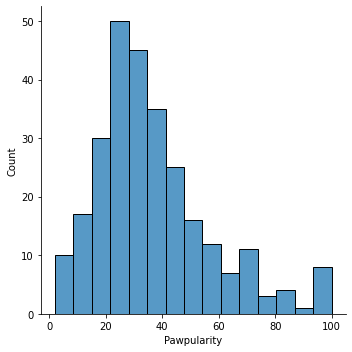

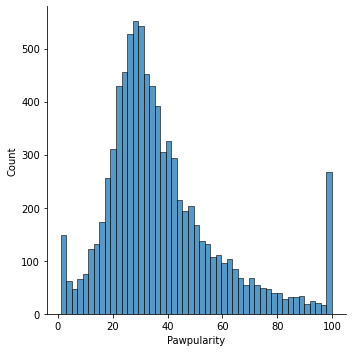

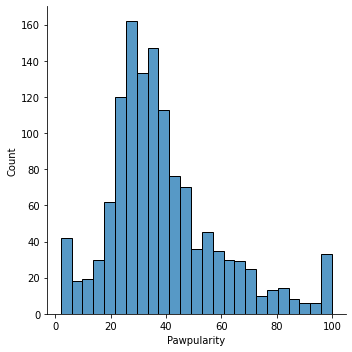

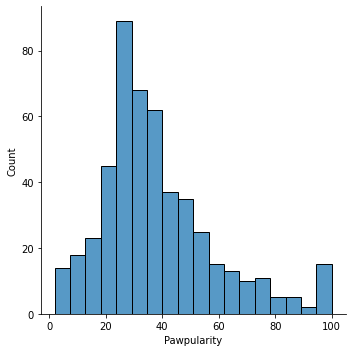

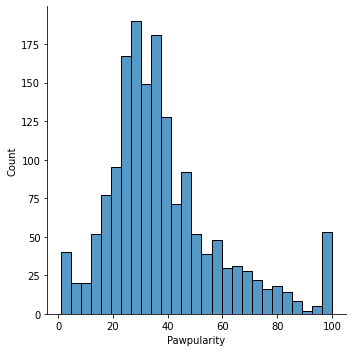

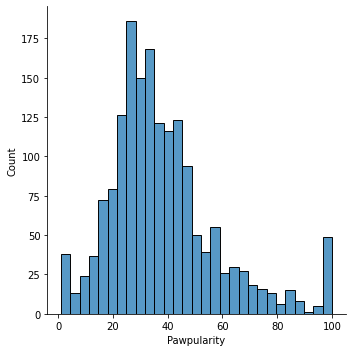

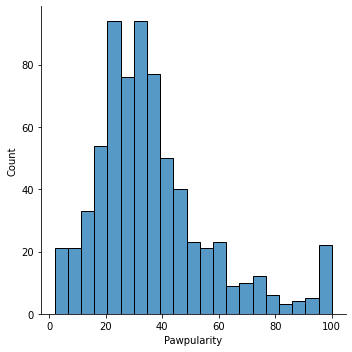

In [4]:
signs = [
    'Subject Focus',
    'Eyes',
    'Face',
    'Near',
    'Action',
    'Accessory',
    'Group',
    'Collage',
    'Human',
    'Occlusion',
    'Info',
    'Blur',
]
for s in signs:
    seaborn.displot(df.loc[df[s] == 1]['Pawpularity'])
    
#seaborn.displot(numpy.log(df['Pawpularity']))
#seaborn.displot(numpy.log(df['Pawpularity']) / numpy.log(100))

#display(df['Pawpularity'].describe())

In [5]:
def signNeurons():
    model = models.Sequential()
    model.add(layers.Dense(32, input_shape=(12,)))
    model.add(layers.Activation('sigmoid'))  
    model.add(layers.Dense(32))
    model.add(layers.Activation('sigmoid'))  
    
    model.add(layers.Dropout(0.1))
    
    model.add(layers.Dense(1))
    model.add(layers.Activation('sigmoid'))
    
    model.compile(optimizer='adam', loss='mse', metrics=[metrics.RootMeanSquaredError(name='rmse')])
    return model

cf = df.copy()
cf = cf.drop('Id', axis=1)
y = cf['Pawpularity'] / 100
cf = cf.drop('Pawpularity', axis=1)

train_cf, test_cf, train_y, test_y = train_test_split(cf, y, test_size=0.2, random_state=RANDOM_STATE)

stopper = callbacks.EarlyStopping(monitor='val_rmse', patience=10)
signNeurons = signNeurons()
history = signNeurons.fit(train_cf, train_y, validation_data=(test_cf, test_y), epochs=200, batch_size=256, callbacks=[stopper])


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

Epoch 1/200
31/31 [==============================] - 1s 10ms/step - loss: 0.0645 - rmse: 0.2540 - val_loss: 0.0409 - val_rmse: 0.2023
Epoch 2/200
31/31 [==============================] - 0s 4ms/step - loss: 0.0467 - rmse: 0.2161 - val_loss: 0.0407 - val_rmse: 0.2018
Epoch 3/200
31/31 [==============================] - 0s 4ms/step - loss: 0.0458 - rmse: 0.2139 - val_loss: 0.0407 - val_rmse: 0.2018
Epoch 4/200
31/31 [==============================] - 0s 4ms/step - loss: 0.0460 - rmse: 0.2144 - val_loss: 0.0407 - val_rmse: 0.2018
Epoch 5/200
31/31 [==============================] - 0s 4ms/step - loss: 0.0455 - rmse: 0.2134 - val_loss: 0.0407 - val_rmse: 0.2018
Epoch 6/200
31/31 [==============================] - 0s 4ms/step - loss: 0.0456 - rmse: 0.2136 - val_loss: 0.0407 - val_rmse: 0.2018
Epoch 7/200
31/31 [==============================] - 0s 4ms/step - loss: 0.0458 - rmse: 0.2141 - val_loss: 0.0407 - val_rmse: 0.2017
Epoch 8/200
31/31 [==============================] - 0s 4ms/step - l

In [6]:
def imageNeurons():
    model = models.Sequential()
    n = 32
    i = 128
    
    model.add(layers.Conv2D(n, (3, 3), input_shape=(i, i, 3), padding='valid'))
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(n, (3, 3), padding='valid'))
    model.add(layers.Activation('relu'))
    
    model.add(layers.MaxPooling2D())
    n *= 2
    
    model.add(layers.Conv2D(n, (3, 3), padding='valid'))
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(n, (3, 3), padding='valid'))
    model.add(layers.Activation('relu'))    
    
    model.add(layers.MaxPooling2D())
    n *= 2
    
    model.add(layers.Conv2D(n, (3, 3), padding='valid'))
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(n, (3, 3), padding='valid'))
    model.add(layers.Activation('relu'))    
    
    model.add(layers.MaxPooling2D())
    n *= 2
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(n))
    model.add(layers.Activation('relu'))
    model.add(layers.Dense(n))
    model.add(layers.Activation('relu'))
    
    model.add(layers.BatchNormalization())
    
    model.add(layers.Dropout(0.1))
    
    model.add(layers.Dense(1))
    model.add(layers.Activation('sigmoid'))
    
    model.compile(optimizer='adam', loss='mse', metrics=[metrics.RootMeanSquaredError(name='rmse')])
    return model

stopper = callbacks.EarlyStopping(monitor='val_rmse', patience=40)

In [7]:
imgs = []
y = []
for _, r in df.iterrows():
    imgs.append(tensorflow.image.resize(tensorflow.io.decode_jpeg(tensorflow.io.read_file(ROOT + 'train/' + r['Id'] + '.jpg'), channels=3), [128, 128]))
    y.append(r['Pawpularity'] / 100)

imgs = numpy.array(imgs)
y = numpy.array(y)

In [8]:
imageNeurons = imageNeurons()

train_images, test_images, train_y, test_y = train_test_split(imgs, y, test_size=0.2, random_state=RANDOM_STATE)

stopper = callbacks.EarlyStopping(monitor='val_rmse', patience=10)
history = imageNeurons.fit(train_images, train_y, validation_data=(test_images, test_y), epochs=20, batch_size=256, callbacks=[stopper])

Epoch 1/20
31/31 [==============================] - 260s 8s/step - loss: 0.0624 - rmse: 0.2498 - val_loss: 0.0887 - val_rmse: 0.2979
Epoch 2/20
31/31 [==============================] - 267s 9s/step - loss: 0.0475 - rmse: 0.2181 - val_loss: 0.0513 - val_rmse: 0.2266
Epoch 3/20
31/31 [==============================] - 263s 9s/step - loss: 0.0476 - rmse: 0.2183 - val_loss: 0.1455 - val_rmse: 0.3814
Epoch 4/20
31/31 [==============================] - 260s 8s/step - loss: 0.0491 - rmse: 0.2215 - val_loss: 0.1261 - val_rmse: 0.3551
Epoch 5/20
31/31 [==============================] - 262s 8s/step - loss: 0.0477 - rmse: 0.2184 - val_loss: 0.2041 - val_rmse: 0.4518
Epoch 6/20
31/31 [==============================] - 259s 8s/step - loss: 0.0476 - rmse: 0.2183 - val_loss: 0.0613 - val_rmse: 0.2476
Epoch 7/20
31/31 [==============================] - 263s 9s/step - loss: 0.0463 - rmse: 0.2152 - val_loss: 0.0526 - val_rmse: 0.2294
Epoch 8/20
31/31 [==============================] - 260s 8s/step - lo

In [9]:
del imgs

In [10]:
test = read_csv('test')

test_imgs = []
for _, r in test.iterrows():
    test_imgs.append(tensorflow.image.resize(tensorflow.io.decode_jpeg(tensorflow.io.read_file(ROOT + 'test/' + r['Id'] + '.jpg'), channels=3), [128, 128]))

test_imgs = numpy.array(test_imgs)

res = pandas.DataFrame()
res['Id'] = test['Id']
test = test.drop('Id', axis=1)
res['Pawpularity'] = (imageNeurons.predict(test_imgs) * 100 + signNeurons.predict(test) * 100) / 2

display(res.head(10))
res.to_csv('submission.csv', index=False)

Id  Pawpularity
0  4128bae22183829d2b5fea10effdb0c3    32.413940
1  43a2262d7738e3d420d453815151079e    32.537876
2  4e429cead1848a298432a0acad014c9d    32.550705
3  80bc3ccafcc51b66303c2c263aa38486    32.205391
4  8f49844c382931444e68dffbe20228f4    32.316319
5  b03f7041962238a7c9d6537e22f9b017    33.068798
6  c978013571258ed6d4637f6e8cc9d6a3    31.830482
7  e0de453c1bffc20c22b072b34b54e50f    31.986767